# Primeira Avaliação de Física Computacional II

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional II
* Professor : Leonardo Machado
* Data de Entrega : 26/02/2021

In [1]:
from dcst import dst, dct, idct, idst
from numpy.fft import rfft,irfft
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

## Problema 5

### Letra a)

Vamos começar definindo as constantes que iremos utilizar ao longo do problema:

In [2]:
L = 1e-8          # Comprimento da caixa [m].
M = 9.109e-31     # Massa do elétron [kg].
N = 1000          # Divisão da caixa em 1000 pontos.
a = L/N           # Espaçamento entre os pontos.
hbar = 1.055e-34  # hbar.

Definimos agora duas funções de onda inicial do elétron em $t=0$:

In [3]:
def psi0(x):
    x0 = L/2     
    sig = 1e-10     
    kap = 5e10      
    re = np.exp(-((x-x0)**2) / (2*sig**2))*np.cos(kap*x)
    imag = np.exp(-((x-x0)**2) / (2*sig**2))*np.sin(kap*x)
    
    return re, imag       

Inicializamos as matrizes reais e imaginárias:

In [4]:
realpart = np.empty(N+1, float)
imagpart = np.empty(N+1, float)

Preenchemos as matrizes com valores reais ou imaginários:

In [5]:
for i in range(0, N+1): 
    realpart[i], imagpart[i] = psi0(i*a)
    # realpart[i] = psi0(i*a).real 
    # imagpart[i] = psi0(i*a).imag 

Agora aplicamos a Transformada Discreta do Seno em cada matriz:

In [6]:
alphaks = dst(realpart)  # Valores de alpha para k = 1 até N+1 
etaks = dst(imagpart)    # Valores de eta para k = 1 até N+1

Vamos printar nossos resultados:

In [7]:
print('alpha =', alphaks)
print('')
print('eta =', etaks)

alpha = [ 0.00000000e+00  4.56008381e-05 -5.75832837e-05 ... -9.67696077e-14
  7.09840715e-16  9.60739429e-14]

eta = [ 0.00000000e+00 -1.83455870e-04 -1.49311998e-05 ...  2.54507719e-13
 -4.32359921e-15 -2.56045700e-13]


### Letra b)

Definimos a função que calcula a parte real da função de onda e retorna a Transformada Discreta Inversa do Seno da parte real:

In [8]:
def realpsicoeffs(t):
    realpart = np.empty(N+1, float)
    for i in range(0, N+1): 
        realpart[i] = alphaks[i]*np.cos(((np.pi**2*hbar*i**2)/(2*M*L**2))*t)  \
                             - etaks[i]*np.sin(((np.pi**2*hbar*i**2)/(2*M*L**2))*t)
    inversed = idst(realpart)
    
    return inversed

Definimos o intervalo de tempo $t=10^{-16}$s:

In [9]:
t1 = 1e-16

Como de costume, definimos a nossa função para melhorar a estética do plot:

In [10]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


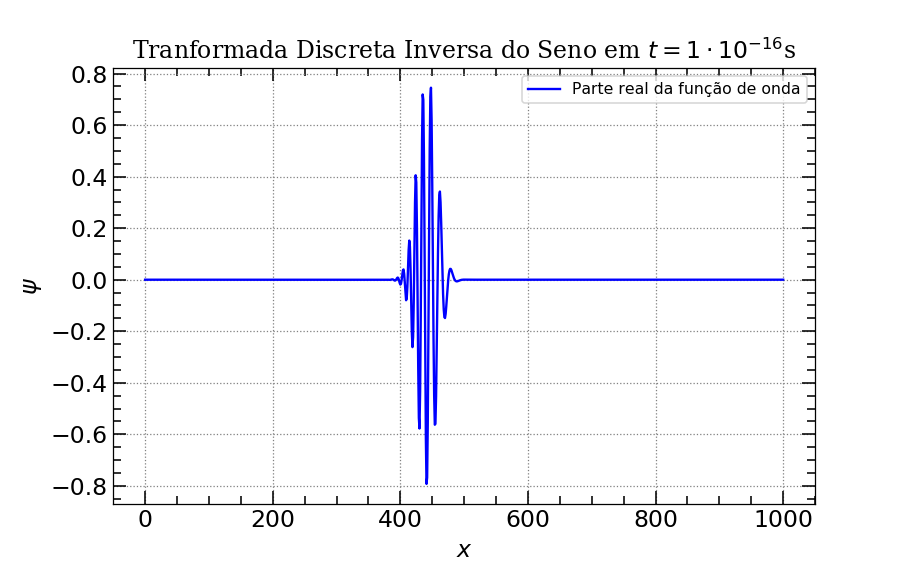

In [11]:
plt.figure(figsize=(8,5))

plt.plot(realpsicoeffs(t1), color='blue', label = "Parte real da função de onda") 
plt.title(r"Tranformada Discreta Inversa do Seno em $t=1\cdot10^{-16}$s", family='serif', fontsize=15)
plt.xlabel(r"$x$", family='serif', fontsize=15)
plt.ylabel(r"$\psi$", family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

### Letra c)

Vamos agora definir os instantes que desejamos calcular a função de onda $t=0$s, $t=2\cdot10^{-16}$s, $t=4\cdot10^{-16}$s, $t=6\cdot10^{-16}$s, $t=8\cdot10^{-16}$s e $t=10^{-15}$ s:

In [12]:
t0 = 0
t2 = 2e-16
t3 = 4e-16
t4 = 6e-16
t5 = 8e-16
t6 = 1e-15

Por fim, vamos plotar todos os instantes em um mesmo gráfico:

<IPython.core.display.Javascript object>


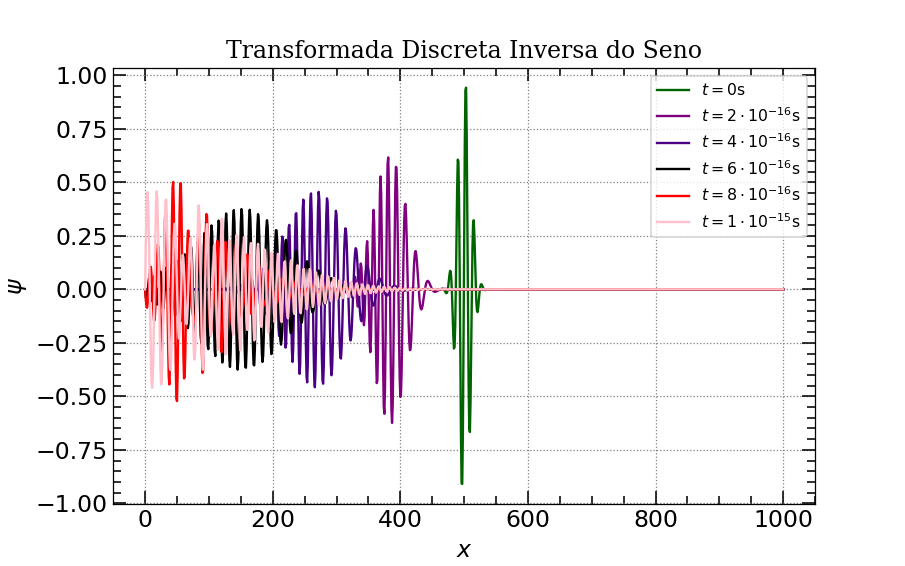

In [13]:
plt.figure(figsize=(8,5))

plt.plot(realpsicoeffs(t0), color='darkgreen', label=r'$t=0$s')
plt.plot(realpsicoeffs(t2), color='purple', label=r'$t=2\cdot10^{-16}$s')
plt.plot(realpsicoeffs(t3), color='indigo', label=r'$t=4\cdot10^{-16}$s')
plt.plot(realpsicoeffs(t4), color='black', label=r'$t=6\cdot10^{-16}$s')
plt.plot(realpsicoeffs(t5), color='red', label=r'$t=8\cdot10^{-16}$s')
plt.plot(realpsicoeffs(t6), color='pink', label=r'$t=1\cdot10^{-15}$s')
plt.title('Transformada Discreta Inversa do Seno', family='serif', fontsize=15)
plt.xlabel(r'$x$', family='serif', fontsize=15)
plt.ylabel(r'$\psi$', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Analisando o gráfico acima, nota-se que o elétron possui uma probabilidade maior de ser encontrado no centro da caixa (na posição $x=500$) em $t=0$s e a medida que a função de onda evolui com o tempo o elétron aparenta se deslocar para as bordas da caixa, uma vez que o gráfico acima representa somente a parte real da função de onda (a parte imaginária seria simétrica, mas ocorreria à direita do gráfico). Nota-se também que a medida que a função de onda evolui no tempo, a mesma torna-se cada vez mais achatada.

$\square$